In [1]:
!pip install seaborn==0.11

     |████████████████████████████████| 283 kB 929 kB/s 
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.10.0
    Uninstalling seaborn-0.10.0:
      Successfully uninstalled seaborn-0.10.0
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/kakr-4th-competition/sample_submission.csv
/kaggle/input/kakr-4th-competition/train.csv
/kaggle/input/kakr-4th-competition/test.csv


In [3]:
train = pd.read_csv('/kaggle/input/kakr-4th-competition/train.csv')

In [4]:
train.head()

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States,<=50K
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,<=50K
3,3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,25,United-States,<=50K
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,20,?,<=50K


In [5]:
print(sns.__version__)

0.11.0


In [6]:
print(train.columns)

Index(['id', 'age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26049 entries, 0 to 26048
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              26049 non-null  int64 
 1   age             26049 non-null  int64 
 2   workclass       26049 non-null  object
 3   fnlwgt          26049 non-null  int64 
 4   education       26049 non-null  object
 5   education_num   26049 non-null  int64 
 6   marital_status  26049 non-null  object
 7   occupation      26049 non-null  object
 8   relationship    26049 non-null  object
 9   race            26049 non-null  object
 10  sex             26049 non-null  object
 11  capital_gain    26049 non-null  int64 
 12  capital_loss    26049 non-null  int64 
 13  hours_per_week  26049 non-null  int64 
 14  native_country  26049 non-null  object
 15  income          26049 non-null  object
dtypes: int64(7), object(9)
memory usage: 3.2+ MB


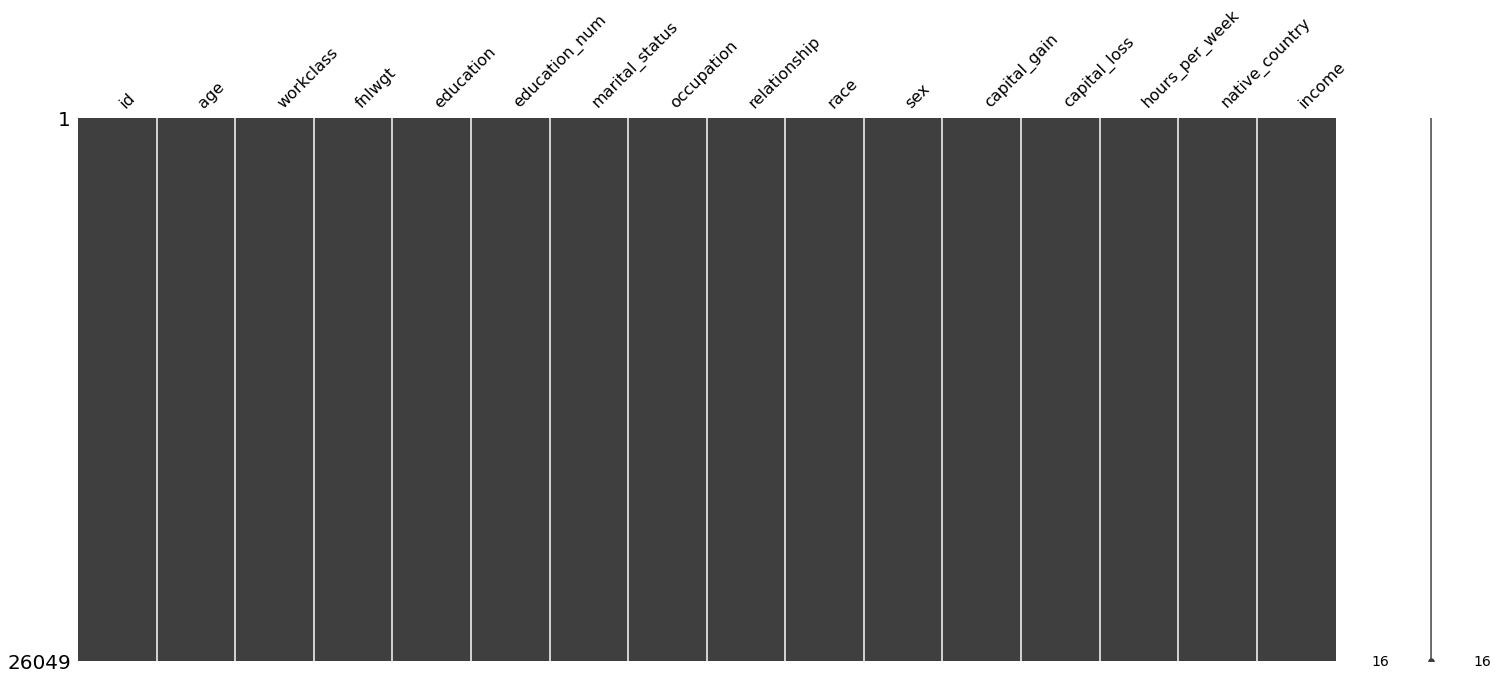

In [8]:
import missingno as msno

msno.matrix(train)

['id', 'age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income']

In [9]:
train['workclass'].value_counts()

Private             18123
Self-emp-not-inc     2030
Local-gov            1692
?                    1502
State-gov            1043
Self-emp-inc          877
Federal-gov           765
Without-pay            11
Never-worked            6
Name: workclass, dtype: int64

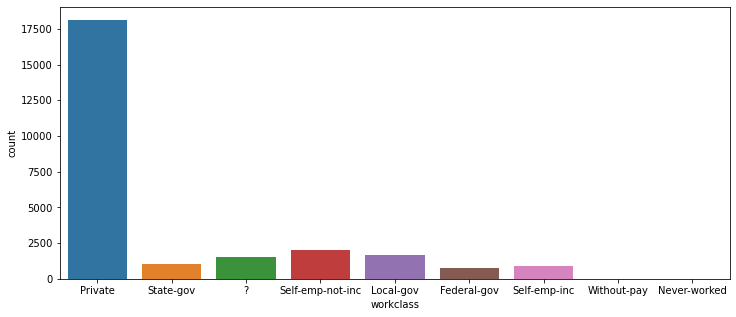

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
sns.countplot(data=train, x='workclass', ax=ax)
plt.show()

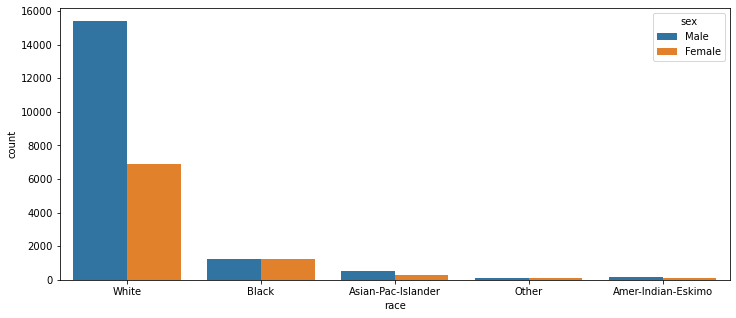

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
sns.countplot(data=train, x='race', ax=ax, hue='sex')
plt.show()

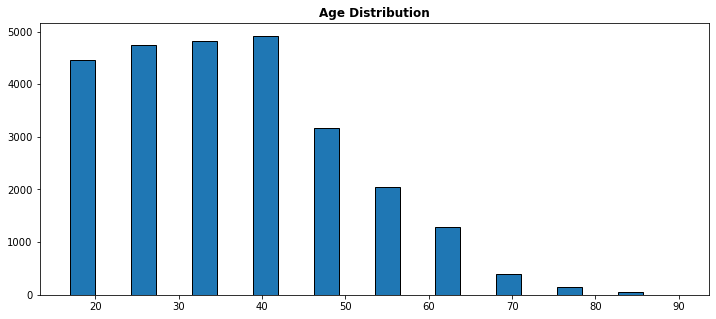

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
ax.hist(train['age'], width=3, edgecolor='black')
ax.set_title('Age Distribution', fontweight='bold')
plt.show()

In [13]:
train['age'].value_counts()

31    712
35    710
23    706
36    700
34    697
     ... 
83      5
88      3
85      2
87      1
86      1
Name: age, Length: 73, dtype: int64

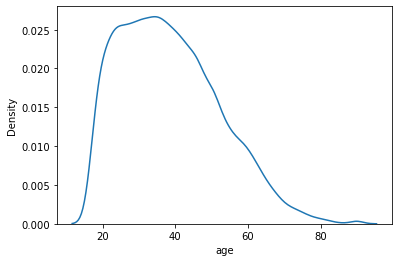

In [14]:
sns.kdeplot(data=train, x='age')

In [15]:
train['income'] = (train['income'] == '>50K').astype(int)
train['income']

0        1
1        0
2        0
3        0
4        0
        ..
26044    0
26045    0
26046    0
26047    0
26048    0
Name: income, Length: 26049, dtype: int64

In [16]:
train.groupby(['race', 'sex']).mean()

id        age         fnlwgt  \
race               sex                                              
Amer-Indian-Eskimo Female  12309.681818  37.454545  117238.954545   
                   Male    12441.331325  36.915663  125551.475904   
Asian-Pac-Islander Female  14562.177778  35.181481  146863.433333   
                   Male    12538.909434  38.884906  166262.398113   
Black              Female  12575.603774  37.939295  216797.705496   
                   Male    13192.518695  37.884646  243795.577566   
Other              Female  13165.047059  31.435294  173440.082353   
                   Male    11760.907563  34.789916  220238.193277   
White              Female  13036.291238  36.844026  184007.053584   
                   Male    13049.281506  39.589163  189231.912524   

                           education_num  capital_gain  capital_loss  \
race               sex                                                 
Amer-Indian-Eskimo Female       9.761364    646.636364     19.556818   
                   Male         9.090361    649.596386     53.662651   
Asian-Pac-Islander Female      10.325926    584.325926     61.122222   
                   Male        11.233962   2026.226415    135.403774   
Black              Female       9.525021    487.988515     40.462674   
                   Male         9.482896    579.319809     76.113763   
Other              Female       8.941176    236.129412     39.176471   
                   Male         8.907563   1799.764706     87.529412   
White              Female      10.127589    580.929761     63.601738   
                   Male        10.149254   1386.644906    103.084945   

                           hours_per_week    income  
race               sex                               
Amer-Indian-Eskimo Female       36.204545  0.102273  
                   Male         41.837349  0.120482  
Asian-Pac-Islander Female       37.407407  0.125926  
                   Male         42.037736  0.341509  
Black              Female       36.796555  0.051682  
                   Male         39.976134  0.190135  
Other              Female       36.670588  0.047059  
                   Male         41.403361  0.117647  
White              Female       36.209269  0.122085  
                   Male         42.687735  0.317846

In [17]:
train.groupby(['race', 'sex'])[['income']].mean().style.background_gradient(cmap='Purples')

In [18]:
pd.pivot_table(train, columns='sex', index='race', values='income', aggfunc='mean')

sex,Female,Male
race,,
Amer-Indian-Eskimo,0.102273,0.120482
Asian-Pac-Islander,0.125926,0.341509
Black,0.051682,0.190135
Other,0.047059,0.117647
White,0.122085,0.317846


In [19]:
pd.pivot_table(train, columns='sex', index='race', values='income', aggfunc='sum')

sex,Female,Male
race,,
Amer-Indian-Eskimo,9,20
Asian-Pac-Islander,34,181
Black,63,239
Other,4,14
White,843,4898


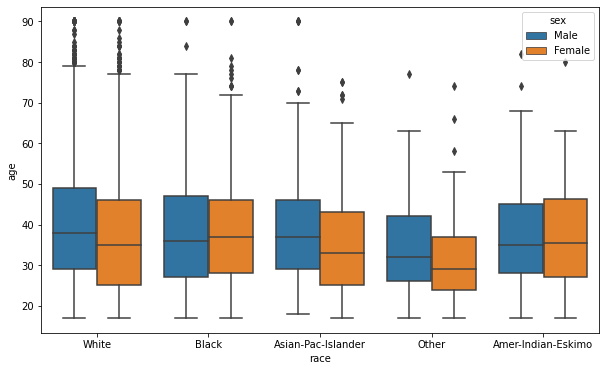

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.boxplot(data=train, x='race', y='age', hue='sex')
# sns.violinplot()
# sns.swarmplot()

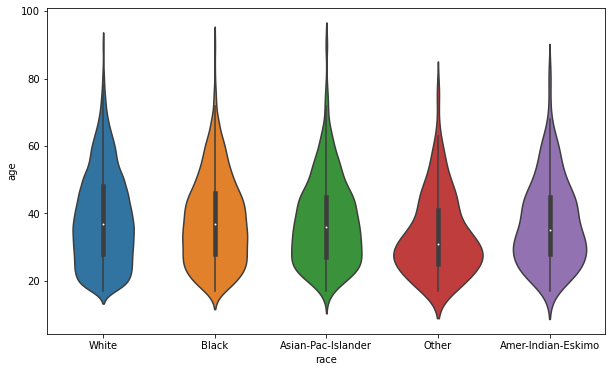

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.violinplot(data=train, x='race', y='age')

In [22]:
train.corr().style.background_gradient(cmap='coolwarm')

,id,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income
id,1.000000,0.007866,-0.001191,0.002309,0.007228,-0.002553,0.005749,0.004350
age,0.007866,1.000000,-0.076618,0.040107,0.077768,0.057875,0.066038,0.229292
fnlwgt,-0.001191,-0.076618,1.000000,-0.046377,0.000953,-0.008689,-0.020064,-0.007500
education_num,0.002309,0.040107,-0.046377,1.000000,0.119382,0.074813,0.146063,0.334582
capital_gain,0.007228,0.077768,0.000953,0.119382,1.000000,-0.032030,0.080543,0.225296
capital_loss,-0.002553,0.057875,-0.008689,0.074813,-0.032030,1.000000,0.054957,0.152537
hours_per_week,0.005749,0.066038,-0.020064,0.146063,0.080543,0.054957,1.000000,0.233726
income,0.004350,0.229292,-0.007500,0.334582,0.225296,0.152537,0.233726,1.000000


In [23]:
corr = train.corr()

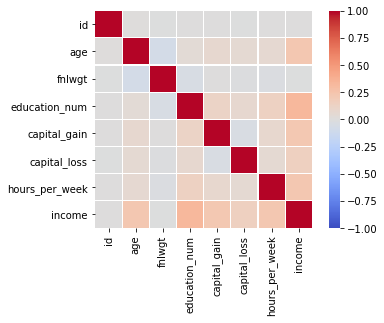

In [24]:
sns.heatmap(corr, square=True, linecolor='white', linewidth=0.1, cmap='coolwarm', vmax=1.0, vmin=-1.0)